# Defining the Statement of Problem

<li> This notebook implements a notebook recommender system
<li> Recommender systems are used to suggest movies or songs to users based on their interest or usage history
<li> In this example we will use User and Item-bases Collaborative Filter
<li> Dataset MovieLens: <a href="https://grouplens.org/datasets/movielens/100k/">https://grouplens.org/datasets/movielens/100k/</a>
<li> Photo Credit: <a href="https://pxhere.com/en/photo/1588369">https://pxhere.com/en/photo/1588369</a>


# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extracción y verificación de data

In [2]:
movie_titles_df = pd.read_csv('Movie_Id_Titles')
movie_titles_df

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [3]:
movie_titles_df.head(9)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)


In [4]:
movie_titles_df.tail(9)

,item_id,title
1673,1674,Mamma Roma (1962)
1674,1675,"Sunchaser, The (1996)"
1675,1676,"War at Home, The (1996)"
1676,1677,Sweet Nothing (1995)
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)
1681,1682,Scream of Stone (Schrei aus Stein) (1991)


In [5]:
movies_rating_df = pd.read_csv('u.data', sep='\t', names=['user_id','item_id','rating','timestamp'])

In [6]:
movies_rating_df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


## Dropeando columnas que no sirven

In [7]:
movies_rating_df.drop(['timestamp'],axis=1,inplace=True)
movies_rating_df

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
...,...,...,...
99998,880,476,3
99999,716,204,5
100000,276,1090,1
100001,13,225,2


## El modelo en términos estadísticos

In [8]:
movies_rating_df.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [9]:
movies_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   rating   100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


# Merge/Join para homologar la data de los titulos con la de los ratings de users

In [10]:
movies_rating_df = pd.merge(movies_rating_df,movie_titles_df, on = 'item_id')
movies_rating_df

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
99998,840,1674,4,Mamma Roma (1962)
99999,655,1640,3,"Eighth Day, The (1996)"
100000,655,1637,3,Girls Town (1996)
100001,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [11]:
movies_rating_df.shape

(100003, 4)

# Visualize Dataset

In [12]:
movies_rating_df.columns

Index(['user_id', 'item_id', 'rating', 'title'], dtype='object')

In [13]:
rating = movies_rating_df.groupby('title')['rating'].describe()
rating

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [14]:
mean_rating = rating['mean']
count_rating = rating['count']

In [15]:
mean_and_count_rating = pd.merge(mean_rating,count_rating,on='title')
mean_and_count_rating = mean_and_count_rating.reset_index()
mean_and_count_rating

,title,mean,count
0,'Til There Was You (1997),2.333333,9.0
1,1-900 (1994),2.600000,5.0
2,101 Dalmatians (1996),2.908257,109.0
3,12 Angry Men (1957),4.344000,125.0
4,187 (1997),3.024390,41.0
...,...,...,...
1659,Young Guns II (1990),2.772727,44.0
1660,"Young Poisoner's Handbook, The (1995)",3.341463,41.0
1661,Zeus and Roxanne (1997),2.166667,6.0
1662,unknown,3.444444,9.0


<AxesSubplot:ylabel='Frequency'>

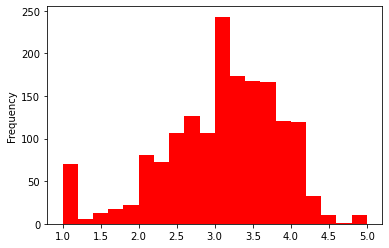

In [16]:
mean_and_count_rating['mean'].plot(bins=20,kind='hist',color='r')

<AxesSubplot:ylabel='Frequency'>

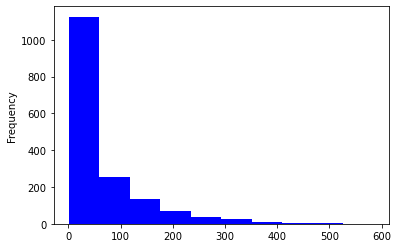

In [17]:
mean_and_count_rating['count'].plot(bins=10, kind='hist', color='b')

In [18]:
mean_and_count_rating[mean_and_count_rating['mean']==5]

,title,mean,count
30,Aiqing wansui (1994),5.0,1.0
462,Entertaining Angels: The Dorothy Day Story (1996),5.0,1.0
633,"Great Day in Harlem, A (1994)",5.0,1.0
944,Marlene Dietrich: Shadow and Light (1996),5.0,1.0
1172,Prefontaine (1997),5.0,3.0
1273,"Saint of Fort Washington, The (1993)",5.0,2.0
1277,Santa with Muscles (1996),5.0,2.0
1359,Someone Else's America (1995),5.0,1.0
1387,Star Kid (1997),5.0,3.0
1472,They Made Me a Criminal (1939),5.0,1.0


In [19]:
mean_and_count_rating.sort_values('mean',ascending=False).head(100)

,title,mean,count
1472,They Made Me a Criminal (1939),5.000000,1.0
944,Marlene Dietrich: Shadow and Light (1996),5.000000,1.0
1273,"Saint of Fort Washington, The (1993)",5.000000,2.0
1359,Someone Else's America (1995),5.000000,1.0
1387,Star Kid (1997),5.000000,3.0
...,...,...,...
97,Arsenic and Old Lace (1944),4.078261,115.0
1644,"Wizard of Oz, The (1939)",4.077236,246.0
610,Glory (1989),4.076023,171.0
996,Monty Python and the Holy Grail (1974),4.066456,316.0


In [20]:
mean_and_count_rating.sort_values('count',ascending=False).head(100)

,title,mean,count
1398,Star Wars (1977),4.359589,584.0
333,Contact (1997),3.803536,509.0
498,Fargo (1996),4.155512,508.0
1234,Return of the Jedi (1983),4.007890,507.0
860,Liar Liar (1997),3.156701,485.0
...,...,...,...
36,Aladdin (1992),3.812785,219.0
109,Babe (1995),3.995434,219.0
1588,Volcano (1997),2.808219,219.0
1507,To Kill a Mockingbird (1962),4.292237,219.0


In [21]:
mean_and_count_rating.sort_values('count',ascending=True).head(1000)

,title,mean,count
1663,Á köldum klaka (Cold Fever) (1994),3.000000,1.0
980,Mille bolle blu (1993),1.000000,1.0
951,Mat' i syn (1997),1.000000,1.0
944,Marlene Dietrich: Shadow and Light (1996),5.000000,1.0
931,"Man from Down Under, The (1943)",1.000000,1.0
...,...,...,...
1243,Rising Sun (1993),2.906977,43.0
1141,Pete's Dragon (1977),2.720930,43.0
1227,Renaissance Man (1994),3.000000,43.0
290,"Chamber, The (1996)",3.093023,43.0


# Item based collaborative filtering

## Pivot Matrix for users vs titles with ratings

In [22]:
users_vs_titles_with_ratings = movies_rating_df.pivot_table(index='user_id',columns='title',values='rating')
users_vs_titles_with_ratings

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Item based collaborative filtering for Titanic Film

In [23]:
titanic = users_vs_titles_with_ratings['Titanic (1997)']

In [24]:
titanic_correlations = pd.DataFrame(users_vs_titles_with_ratings.corrwith(titanic), columns=['Correlation'])
titanic_correlations

/home/felipe/anaconda3/envs/prueba/lib/python3.8/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/felipe/anaconda3/envs/prueba/lib/python3.8/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654
...,...
Young Guns II (1990),0.317274
"Young Poisoner's Handbook, The (1995)",0.356783
Zeus and Roxanne (1997),NaN


In [25]:
# titanic_correlations = titanic_correlations.join(mean_and_count_rating['count'])

titanic_correlations = pd.merge(mean_and_count_rating,titanic_correlations, on='title')
titanic_correlations = titanic_correlations.drop('mean',axis=1)
titanic_correlations

,title,count,Correlation
0,'Til There Was You (1997),9.0,-0.062017
1,1-900 (1994),5.0,NaN
2,101 Dalmatians (1996),109.0,0.120113
3,12 Angry Men (1957),125.0,0.077700
4,187 (1997),41.0,0.315654
...,...,...,...
1659,Young Guns II (1990),44.0,0.317274
1660,"Young Poisoner's Handbook, The (1995)",41.0,0.356783
1661,Zeus and Roxanne (1997),6.0,NaN
1662,unknown,9.0,NaN


In [26]:
titanic_correlations = titanic_correlations.dropna()
titanic_correlations

,title,count,Correlation
0,'Til There Was You (1997),9.0,-0.062017
2,101 Dalmatians (1996),109.0,0.120113
3,12 Angry Men (1957),125.0,0.077700
4,187 (1997),41.0,0.315654
5,2 Days in the Valley (1996),93.0,0.017295
...,...,...,...
1655,Year of the Horse (1997),7.0,1.000000
1657,Young Frankenstein (1974),200.0,0.107666
1658,Young Guns (1988),101.0,0.199931
1659,Young Guns II (1990),44.0,0.317274


In [27]:
titanic_correlations = titanic_correlations.sort_values('Correlation',ascending=False)
titanic_correlations.head(100)

,title,count,Correlation
1038,Nadja (1994),8.0,1.000000
1140,"Pest, The (1997)",8.0,1.000000
1278,"Savage Nights (Nuits fauves, Les) (1992)",3.0,1.000000
541,For Ever Mozart (1996),3.0,1.000000
779,"Jerky Boys, The (1994)",3.0,1.000000
...,...,...,...
1557,"Umbrellas of Cherbourg, The (Parapluies de Che...",21.0,0.661438
977,Mighty Morphin Power Rangers: The Movie (1995),11.0,0.659234
923,Major Payne (1994),19.0,0.656532
308,City of Industry (1997),6.0,0.654654


In [28]:
titanic_correlations[titanic_correlations['count']>100].sort_values('Correlation',ascending=False).head()

,title,count,Correlation
1500,Titanic (1997),350.0,1.000000
1244,"River Wild, The (1994)",146.0,0.497600
16,"Abyss, The (1989)",151.0,0.472103
223,Bram Stoker's Dracula (1992),120.0,0.443560
1533,True Lies (1994),208.0,0.435104


# Item based collaborative filtering for Star Wars Film

In [29]:
star_wars = users_vs_titles_with_ratings['Star Wars (1977)']
star_wars 

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [30]:
star_wars_correlations = pd.DataFrame(users_vs_titles_with_ratings.corrwith(star_wars),columns=['Correlation'])
star_wars_correlations

/home/felipe/anaconda3/envs/prueba/lib/python3.8/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/felipe/anaconda3/envs/prueba/lib/python3.8/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [31]:
star_wars_correlations = pd.merge(mean_and_count_rating,star_wars_correlations,on='title')
star_wars_correlations = star_wars_correlations.drop('mean',axis=1)
star_wars_correlations.dropna(inplace=True)
star_wars_correlations

,title,count,Correlation
0,'Til There Was You (1997),9.0,0.872872
1,1-900 (1994),5.0,-0.645497
2,101 Dalmatians (1996),109.0,0.211132
3,12 Angry Men (1957),125.0,0.184289
4,187 (1997),41.0,0.027398
...,...,...,...
1658,Young Guns (1988),101.0,0.186377
1659,Young Guns II (1990),44.0,0.228615
1660,"Young Poisoner's Handbook, The (1995)",41.0,-0.007374
1661,Zeus and Roxanne (1997),6.0,0.818182


In [32]:
star_wars_correlations[star_wars_correlations['count']>100].sort_values('Correlation',ascending=False).head()

,title,count,Correlation
1398,Star Wars (1977),584.0,1.000000
456,"Empire Strikes Back, The (1980)",368.0,0.748353
1234,Return of the Jedi (1983),507.0,0.672556
1205,Raiders of the Lost Ark (1981),420.0,0.536117
104,Austin Powers: International Man of Mystery (1...,130.0,0.377433


## Item Based Collaborative Filter on the entire dataset

In [33]:
users_vs_titles_with_ratings

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
movies_correlations = users_vs_titles_with_ratings.corr(method = 'pearson', min_periods = 80)
movies_correlations

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
my_ratings = pd.read_csv('My_Ratings.csv')

In [36]:
my_ratings

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


In [37]:
my_ratings['Movie Name'][0]

'Liar Liar (1997)'

In [38]:
total_list_similar_movie = []

for i in range(len(my_ratings)):
    similar_movies = movies_correlations[my_ratings['Movie Name'][i]].dropna()    
    similar_movies = similar_movies.map(lambda x:x * my_ratings['Ratings'][i])
    total_list_similar_movie.append(similar_movies)
    

total_list_similar_movie[0].sort_values(ascending=False).head(50)
# similar_movie_list[1]


title
Liar Liar (1997)                             5.000000
Con Air (1997)                               2.349141
Pretty Woman (1990)                          2.348951
Michael (1996)                               2.210110
Indiana Jones and the Last Crusade (1989)    2.072136
Top Gun (1986)                               2.028602
G.I. Jane (1997)                             1.989656
Multiplicity (1996)                          1.984302
Grumpier Old Men (1995)                      1.953494
Ghost and the Darkness, The (1996)           1.895376
Back to the Future (1985)                    1.890139
Jurassic Park (1993)                         1.853851
Saint, The (1997)                            1.814017
Field of Dreams (1989)                       1.801694
Shawshank Redemption, The (1994)             1.772663
Aladdin (1992)                               1.772528
While You Were Sleeping (1995)               1.761150
Mrs. Doubtfire (1993)                        1.748763
Mission: Impossible (1

# Guarde y Cargue

In [39]:
# movie_titles_df.to_csv('Guarde y Cargue/movie_titles_df.csv', encoding='utf-8')
# movies_rating_df.to_csv('Guarde y Cargue/movies_rating_df.csv', encoding='utf-8')
# rating.to_csv('Guarde y Cargue/rating.csv', encoding='utf-8')
# mean_rating.to_csv('Guarde y Cargue/mean_rating.csv',encoding='utf-8')
# count_rating.to_csv('Guarde y Cargue/count_rating.csv', encoding='utf-8')
# mean_and_count_rating.to_csv('Guarde y Cargue/mean_and_count_rating.csv', encoding='utf-8')

In [40]:
# movie_titles_df = pd.read_csv('Guarde y Cargue/movie_titles_df.csv')
# movies_rating_df = pd.read_csv('Guarde y Cargue/movies_rating_df.csv')
# rating = pd.read_csv('Guarde y Cargue/rating.csv')
# mean_rating = pd.read_csv('Guarde y Cargue/mean_rating.csv')
# count_rating = pd.read_csv('Guarde y Cargue/count_rating.csv')
# mean_and_count_rating = pd.read_csv('Guarde y Cargue/mean_and_count_rating.csv')